<a href="https://colab.research.google.com/github/Moisito12/Tensorflow-2.0/blob/master/Crear_una_API_para_clasificar_im%C3%A1genes_con_Tensor_Flow_Serving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Paso 1: Instalar dependencias y configurar el proyecto en gpu**

In [1]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  43279      0 --:--:-- --:--:-- --:--:-- 43279
OK


In [3]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 49kB/s 
     |████████████████████████████████| 3.2MB 36.8MB/s 
     |████████████████████████████████| 368kB 59.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [29]:
!apt-get update & apt-get install tensorflow-model-server

Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree  

In [30]:
!pip install requests

**Paso 2:** Importar las librerías del proyecto

In [31]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

'1.13.1'

**Paso 3:** Preprocesar los datos

**Cargar el dataset**

In [0]:
# carga los datos y genera dos tuplas una para el entrenamiento y otro para el testeo
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['avion', 'coche','pájaro', 'gato', 'ciervo','perro','rana','caballo','barco','camión']

**Normalización de las imágenes**

In [0]:
X_train = X_train  / 255.0
X_test = X_test/ 255.0

In [35]:
X_train.shape

(50000, 32, 32, 3)

**Paso 4:** Definir el modelo

Nota: Se va a realizar el uso de la red ya realizada en la red neuronal convolucional

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

**Compilar el modelo**

In [0]:
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

**Entrenar el modelo**

In [38]:
model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10
)

Epoch 1/10
50000/50000 [==============================] - 5s 105us/sample - loss: 1.5124 - sparse_categorical_accuracy: 0.4474
Epoch 2/10
50000/50000 [==============================] - 5s 99us/sample - loss: 1.0493 - sparse_categorical_accuracy: 0.6284
Epoch 3/10
50000/50000 [==============================] - 5s 99us/sample - loss: 0.8639 - sparse_categorical_accuracy: 0.6987
Epoch 4/10
50000/50000 [==============================] - 5s 100us/sample - loss: 0.7416 - sparse_categorical_accuracy: 0.7396
Epoch 5/10
50000/50000 [==============================] - 5s 101us/sample - loss: 0.6417 - sparse_categorical_accuracy: 0.7761
Epoch 6/10
50000/50000 [==============================] - 5s 100us/sample - loss: 0.5614 - sparse_categorical_accuracy: 0.8039
Epoch 7/10
50000/50000 [==============================] - 5s 101us/sample - loss: 0.4814 - sparse_categorical_accuracy: 0.8308
Epoch 8/10
50000/50000 [==============================] - 5s 101us/sample - loss: 0.4082 - sparse_categorical_acc

**Evaluar el modelo**

In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 110us/sample - loss: 0.8714 - sparse_categorical_accuracy: 0.7483


In [40]:
print("La precisión del model es: {}".format(test_accuracy*100.0))

La precisión del model es: 74.83000159263611


**Paso 5:** Guardar el modelo para subir a producción

**Crear un directorio para el modelo**

In [0]:
MODEL_DIR = "model/"
version = 1

In [42]:
export_path = os.path.join(MODEL_DIR, str(version))
export_path

'model/1'

In [0]:
if os.path.isdir(export_path):
  !rm -r {export_path}

**Guardar el modelo de Tensor Flow Serving**

In [44]:
tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir=export_path, inputs={"input_image":model.input}, outputs={t.name:t for t in model.outputs})

INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/1/saved_model.pb


**Paso 6:** Configurar el entorno de producción

Exportar el MODEL_DIR a las variables de entorno

In [0]:
os.environ['MODEL_DIR'] = os.path.abspath(MODEL_DIR)

**Ejecutar la API Rest de Tensorflow Serving**

In [46]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8000 --model_name=cifar10 --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 3 in a separate thread.


In [47]:
!tail   server.log

2020-01-29 00:40:35.368646: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:264] Reading SavedModel debug info (if present) from: /content/model/1
2020-01-29 00:40:35.368727: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-01-29 00:40:35.399295: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:203] Restoring SavedModel bundle.
2020-01-29 00:40:35.461879: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:333] SavedModel load for tags { serve }; Status: success: OK. Took 100218 microseconds.
2020-01-29 00:40:35.464178: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /content/model/1/assets.extra/tf_serving_warmup_requests
2020-01-29 00:40:35.464267: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: cifar10 version: 1}
2020-01-29 00:40

**Paso 7:** Crear nuestra primeria petición por POST

In [48]:
random_image = np.random.randint(0, len(X_test))
random_image

5310

**Crear el objeto de datos en json**

In [0]:
data = json.dumps({"signature_name":"serving_default", "instances":[X_test[random_image].tolist()]})

In [50]:
data

'{"signature_name": "serving_default", "instances": [[[[0.38823529411764707, 0.47058823529411764, 0.4], [0.3803921568627451, 0.4627450980392157, 0.39215686274509803], [0.3803921568627451, 0.4627450980392157, 0.39215686274509803], [0.39215686274509803, 0.4745098039215686, 0.403921568627451], [0.4, 0.4823529411764706, 0.4117647058823529], [0.3843137254901961, 0.4666666666666667, 0.4117647058823529], [0.3803921568627451, 0.4627450980392157, 0.4196078431372549], [0.4117647058823529, 0.48627450980392156, 0.4470588235294118], [0.4235294117647059, 0.48627450980392156, 0.43529411764705883], [0.39215686274509803, 0.4549019607843137, 0.40784313725490196], [0.4117647058823529, 0.4745098039215686, 0.42745098039215684], [0.4, 0.4627450980392157, 0.41568627450980394], [0.38823529411764707, 0.45098039215686275, 0.403921568627451], [0.4, 0.4627450980392157, 0.41568627450980394], [0.403921568627451, 0.4666666666666667, 0.41568627450980394], [0.403921568627451, 0.4627450980392157, 0.4196078431372549], [

**Enviar la primera petición por POST**

In [0]:
headers = {"content-type": "application/json"}

In [0]:
json_response = requests.post(url="http://localhost:8000/v1/models/cifar10:predict", data=data, headers=headers)

In [53]:
json_response

<Response [200]>

In [0]:
predictions = json.loads(json_response.text)['predictions']

In [62]:
predictions

[[0.815058172,
  8.78179799e-06,
  0.181358412,
  0.00152557215,
  1.32313953e-05,
  0.000187260463,
  0.000901036139,
  7.56890731e-05,
  0.000868395495,
  3.40938345e-06]]

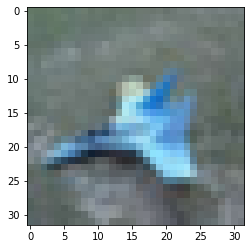

In [63]:
plt.imshow(X_test[random_image])

In [64]:
class_names[np.argmax(predictions[0])]

0

**Paso 8:** Enviar una petición POST a un modelo especifíco

In [0]:
specific_json_response = requests.post(url ="http://localhost:8000/v1/models/cifar10/versions/1:predict", data=data, headers=headers)

In [60]:
specific_json_response

<Response [200]>